In [1]:
from pyDACP import core, chebyshev
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.linalg import eigh, eig, eigvalsh
from scipy.sparse import diags, eye
from scipy.sparse.linalg import eigsh

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["lines.linewidth"] = 0.65
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 16

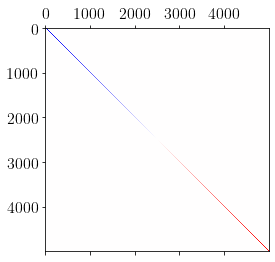

In [2]:
N = 5000
b = np.linspace(-1, 1, N)

H = diags(b, offsets=0)

plt.matshow(H.toarray().real, cmap='bwr', vmin=-1, vmax=1)
plt.show()

In [3]:
dacp=core.DACP_reduction(H, a=0.2, eps=0.05, sampling_subspace=1.5)

In [4]:
S1, H1 = dacp.direct_eigenvalues()

/opt/conda/lib/python3.9/site-packages/scipy/integrate/quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


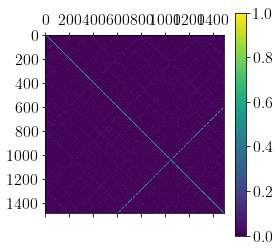

In [5]:
plt.matshow(np.abs(S1), vmin=0, vmax=1)
plt.colorbar()

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-1e-20, 1e-20)

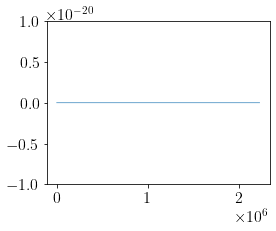

In [6]:
plt.plot((S1 - S1.conj().T).flatten())
plt.ylim(-1e-20, 1e-20)

In [7]:
s, V = eigh(S1)
indx = np.abs(s.real) > 1e-12
lambda_s = np.diag(1/np.sqrt(s[indx], dtype='complex'))
U = V[:, indx]@lambda_s
Hred1 = U.T.conj() @ H1 @ U
Hred1.shape

(927, 927)

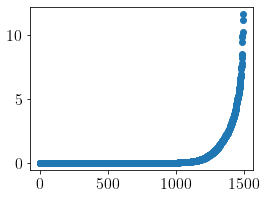

In [8]:
plt.plot(s.real, 'o')

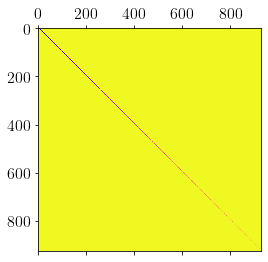

In [9]:
plt.matshow(np.abs(Hred1), vmin=0, vmax=0.2, cmap='plasma_r')

(-0.2, 0.2)

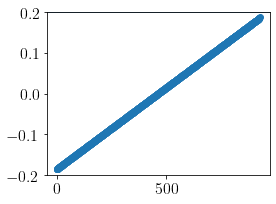

In [10]:
plt.plot(np.sort(eigvalsh(Hred1)), 'o')
plt.axhline(-dacp.a)
plt.axhline(dacp.a)
plt.ylim(-dacp.a, dacp.a)

In [11]:
dacp.span_basis()
S = dacp.v_basis.conj() @ dacp.v_basis.T
H = dacp.v_basis.conj() @ dacp.matrix.dot(dacp.v_basis.T)

/opt/conda/lib/python3.9/site-packages/scipy/integrate/quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


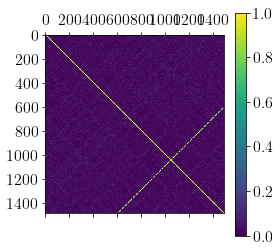

In [12]:
plt.matshow(np.abs(S), vmin=0, vmax=1)
plt.colorbar()

In [14]:
s, V = eigh(S)
indx = np.abs(s) > 1e-12
lambda_s = np.diag(1/np.sqrt(s[indx]))
U = V[:, indx]@lambda_s
Hred = U.T.conj() @ H @ U

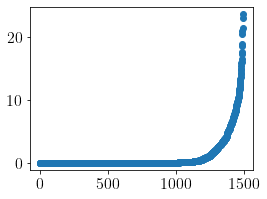

In [15]:
plt.plot(s, 'o')

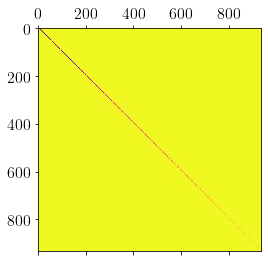

In [16]:
plt.matshow(np.abs(Hred), vmin=0, vmax=0.2, cmap='plasma_r')

(-0.3, 0.3)

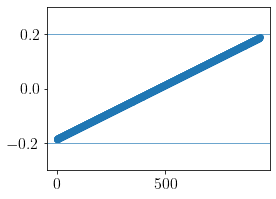

In [17]:
plt.plot(np.sort(eigvalsh(Hred)), 'o')
plt.axhline(-0.2)
plt.axhline(0.2)
plt.ylim(-0.3, 0.3)

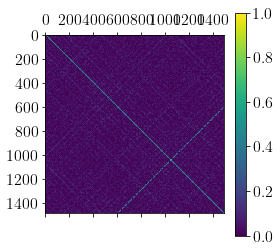

In [18]:
plt.matshow((np.abs(S - S1)), vmin=0, vmax=1)
plt.colorbar()